In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

c:\Users\Student\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('FA-KES-Dataset.csv', encoding='ISO-8859-1')

In [3]:
df

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1


In [5]:
df.describe()

,unit_id,labels
count,8.040000e+02,804.000000
mean,1.936024e+09,0.529851
std,1.876968e+07,0.499419
min,1.914948e+09,0.000000
25%,1.923848e+09,0.000000
50%,1.924058e+09,1.000000
75%,1.962496e+09,1.000000
max,1.965511e+09,1.000000


In [6]:
df.describe

<bound method NDFrame.describe of         unit_id                                      article_title  \
0    1914947530  Syria attack symptoms consistent with nerve ag...   
1    1914947532  Homs governor says U.S. attack caused deaths b...   
2    1914947533    Death toll from Aleppo bomb attack at least 112   
3    1914947534        Aleppo bomb blast kills six Syrian state TV   
4    1914947535  29 Syria Rebels Dead in Fighting for Key Alepp...   
..          ...                                                ...   
799  1965511221    Turkish Bombardment Kills 20 Civilians in Syria   
800  1965511222    Martyrs as Terrorists Shell Aleppos Salah Eddin   
801  1965511224  Chemical Attack Kills Five Syrians in Aleppo SANA   
802  1965511226  5 Killed as Russian Military Chopper Shot down...   
803  1965511231  Syrian Army Kills 48 ISIL Terrorists in Deir E...   

                                       article_content source       date  \
0    Wed 05 Apr 2017 Syria attack symptoms consis

In [8]:
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [9]:
df.tail()

,unit_id,article_title,article_content,source,date,location,labels
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1
803,1965511231,Syrian Army Kills 48 ISIL Terrorists in Deir E...,April 6 2017 Syrian Army Kills 48 ISIL Terrori...,manar,4/4/2017,deir ezzor,1


In [140]:
df = df.drop(["article_title", "article_content","date"], axis = 1)

In [141]:
df

,unit_id,source,location,labels
0,1914947530,nna,idlib,0
1,1914947532,nna,homs,0
2,1914947533,nna,aleppo,0
3,1914947534,nna,aleppo,0
4,1914947535,nna,aleppo,0
...,...,...,...,...
799,1965511221,manar,aleppo,1
800,1965511222,manar,aleppo,1
801,1965511224,manar,aleppo,0
802,1965511226,manar,idlib,1


In [142]:
df.shape

(804, 4)

In [143]:
df.isnull().sum()

unit_id     0
source      0
location    0
labels      0
dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

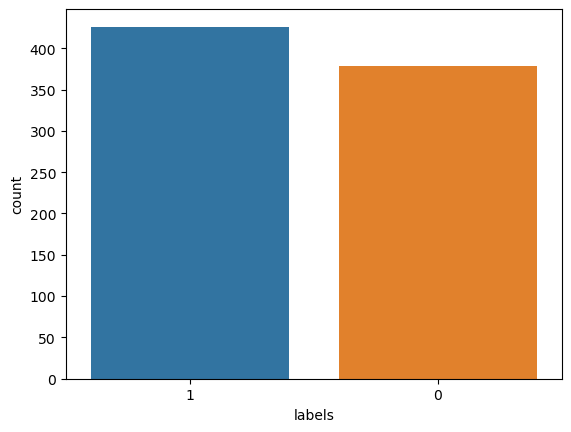

In [145]:
sns.countplot(data=df,
              x='labels',
              order=df['labels'].value_counts().index)

In [147]:
pip install wordcloud


     ------------------------------------ 300.6/300.6 kB 977.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [148]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [150]:
preprocessed_review = preprocess_text(df['source'].values)
data['source'] = preprocessed_review

100%|██████████| 804/804 [00:00<00:00, 6015.58it/s]


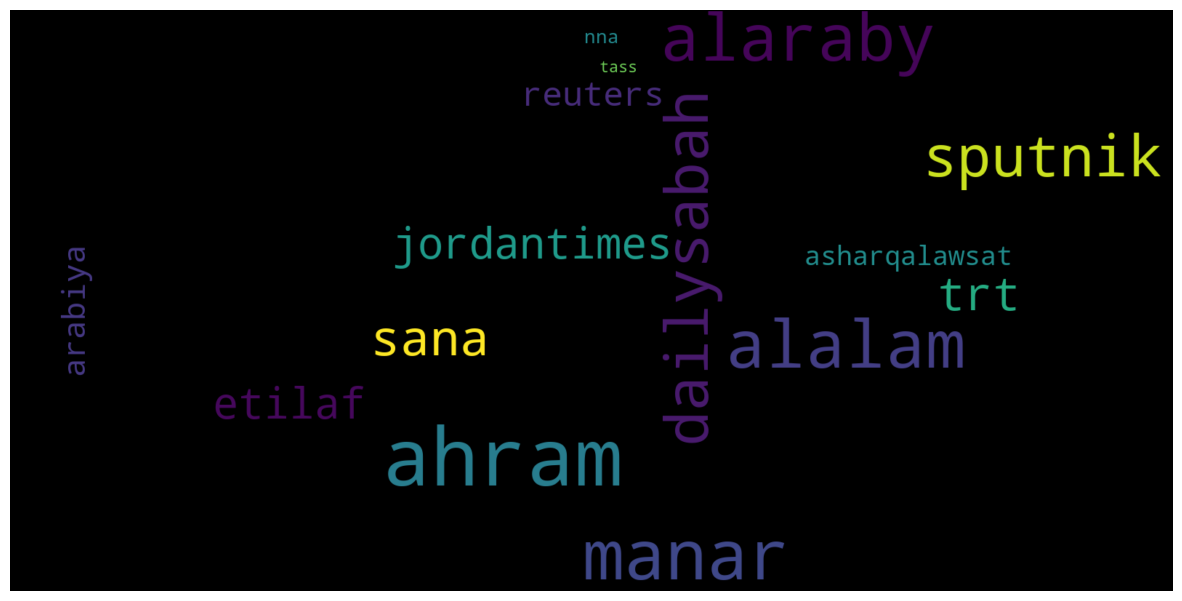

In [151]:
consolidated = ' '.join(
    word for word in data['source'][data['labels'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

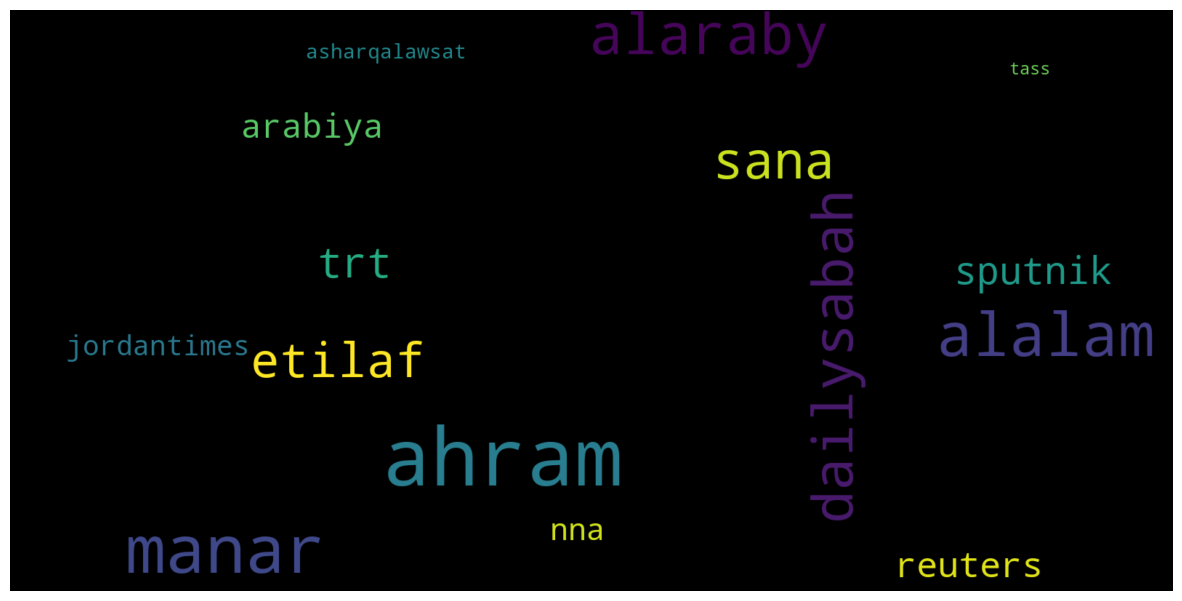

In [152]:
consolidated = ' '.join(
    word for word in data['source'][data['labels'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

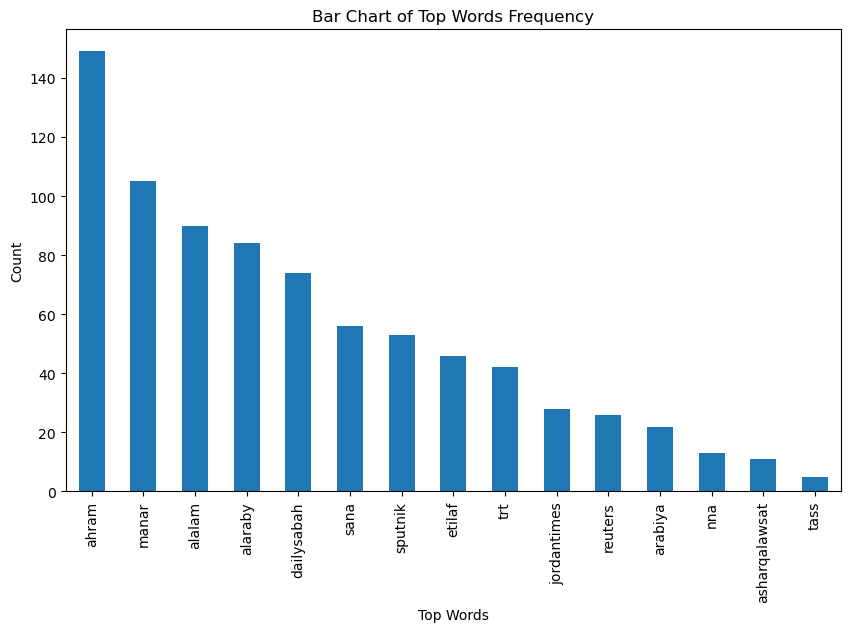

In [154]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['source'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['source'], 
                                                    data['labels'], 
                                                    test_size=0.25)


In [156]:
x_train

452          sana
346    dailysabah
496        etilaf
355    dailysabah
356    dailysabah
          ...    
594        alalam
183         ahram
5             nna
280         ahram
62            trt
Name: source, Length: 603, dtype: object

In [157]:
x_test

479           sana
232          ahram
459         etilaf
622         alalam
285    jordantimes
          ...     
282          ahram
762          manar
264          ahram
175          ahram
267          ahram
Name: source, Length: 201, dtype: object

In [158]:
y_train

452    0
346    0
496    0
355    0
356    0
      ..
594    0
183    0
5      0
280    0
62     0
Name: labels, Length: 603, dtype: int64

In [159]:
y_test

479    1
232    1
459    0
622    1
285    1
      ..
282    1
762    0
264    1
175    1
267    1
Name: labels, Length: 201, dtype: int64

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [161]:
x_train

<603x15 sparse matrix of type '<class 'numpy.float64'>'
	with 603 stored elements in Compressed Sparse Row format>

In [162]:
x_test

<201x15 sparse matrix of type '<class 'numpy.float64'>'
	with 201 stored elements in Compressed Sparse Row format>

In [163]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.5456053067993366
0.5373134328358209


In [10]:
df.columns

Index(['unit_id', 'article_title', 'article_content', 'source', 'date',
       'location', 'labels'],
      dtype='object')

In [11]:
df.dtypes

unit_id             int64
article_title      object
article_content    object
source             object
date               object
location           object
labels              int64
dtype: object

In [12]:
df.isnull().sum()

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64

In [13]:
df['article_title'].unique()

array(['Syria attack symptoms consistent with nerve agent use WHO',
       'Homs governor says U.S. attack caused deaths but doesnt see big human losses',
       'Death toll from Aleppo bomb attack at least 112',
       'Aleppo bomb blast kills six Syrian state TV',
       '29 Syria Rebels Dead in Fighting for Key Aleppo Road',
       'Suicide bombing kills at least 16 in northeast Syria',
       '22 dead in heavy U.S. raids on IS Syria stronghold',
       'Suicide bomber kills 4 in Assad clans hometown',
       'Explosion rocks down town Damascus',
       'Damascus explosion due to rocket bomb',
       'Syrian regime steps up aerial assault on Douma',
       'Hizballah leads regime offensive in southern Syria',
       'Syrian opposition remains divided',
       'IS video shows murder of 2 Syrian activists',
       'Syrias Nusra Front stages deadly suicide bombing in Aleppo',
       'Regime troops thwart rebel attack in Syrias Aleppo',
       'Ahrar al-Sham leader killed in Syria',
   

In [14]:
df['article_content'].unique()

array(['Wed 05 Apr 2017 Syria attack symptoms consistent with nerve agent use WHO. Victims of a suspected chemical attack in Syria appeared to show symptoms consistent with reaction to a nerve agent the World Health Organization said on Wednesday. "Some cases appear to show additional signs consistent with exposure to organophosphorus chemicals a category of chemicals that includes nerve agents" WHO said in a statement putting the death toll at at least 70. The United States has said the deaths were caused by sarin nerve gas dropped by Syrian aircraft. Russia has said it believes poison gas had leaked from a rebel chemical weapons depot struck by Syrian bombs. Sarin is an organophosporus compound and a nerve agent. Chlorine and mustard gas which are also believed to have been used in the past in Syria are not. A Russian Defence Ministry spokesman did not say what agent was used in the attack but said the rebels had used the same chemical weapons in Aleppo last year. The WHO said it was

In [15]:
df['source'].unique()

array(['nna', 'alaraby', 'asharqalawsat', 'dailysabah', 'trt', 'ahram',
       'jordantimes', 'tass', 'sana', 'etilaf', 'manar', 'arabiya',
       'reuters', 'alalam', 'sputnik'], dtype=object)

In [16]:
df['location'].unique()

array(['idlib', 'homs', 'aleppo', 'hasakeh', 'raqqa', 'lattakia',
       'damascus', 'hama', 'deir ezzor', 'quneitra', 'daraa', 'tartous'],
      dtype=object)

In [17]:
df['date'].unique()

array(['4/5/2017', '4/7/2017', '4/16/2017', '4/19/2017', '7/10/2016',
       '7/5/2016', '7/5/2015', '2/22/2015', '2/1/2015', '8/24/2013',
       '2/12/2015', '2/23/2015', '7/6/2015', '7/7/2015', '7/8/2015',
       '7/15/2015', '7/16/2015', '7/28/2015', '7/29/2015', '8/3/2015',
       '7/2/2016', '4/18/2017', '4/4/2017', '3/25/2017', '8/3/2016',
       '7/12/2016', '7/20/2016', '8/12/2016', '8/3/2013', '2/18/2015',
       '7/20/2015', '7/21/2015', '4/2/2017', '7/4/2015', '7/19/2016',
       '7/29/2016', '7/27/2016', '7/21/2016', '8/15/2016', '8/11/2016',
       '8/9/2016', '4/3/2017', '4/9/2017', '5/2/2017', '4/30/2017',
       '4/27/2017', '4/15/2017', '4/12/2016', '7/18/2016', '7/25/2016',
       '8/5/2016', '8/14/2016', '8/19/2016', '8/25/2016', '8/28/2016',
       '8/29/2016', '4/25/2017', '4/8/2017', '4/13/2017', '10/29/2016',
       '10/27/2016', '10/13/2016', '10/26/2016', '10/24/2016',
       '10/19/2016', '10/17/2016', '10/14/2016', '10/11/2016',
       '10/7/2016', '10/5/2016

In [22]:
df.isnull().sum()

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64

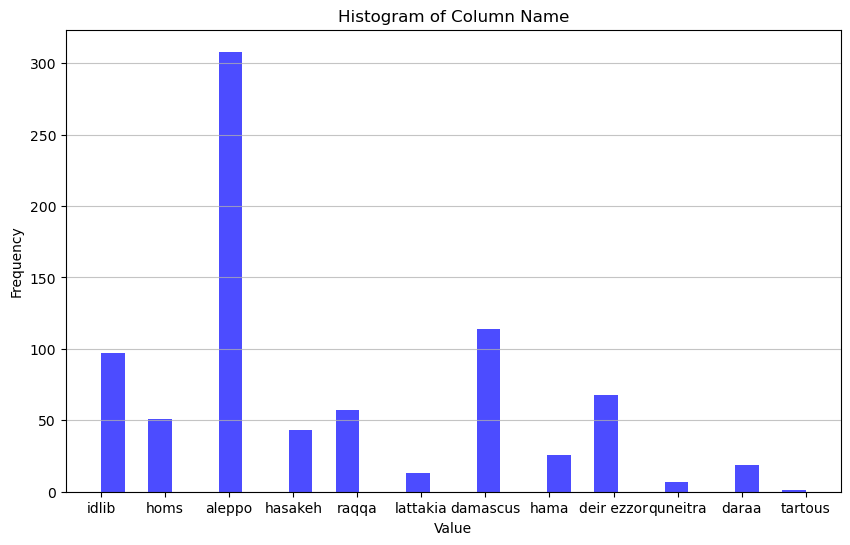

c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


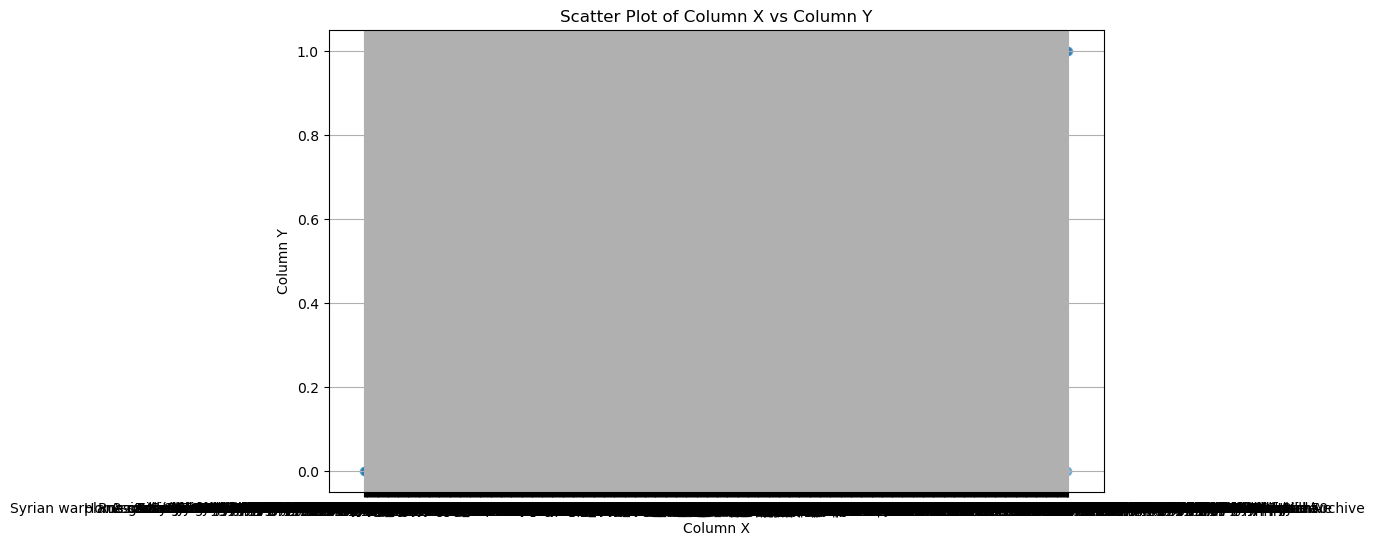

In [30]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Load the dataset with a specified encoding
#file_path = 'FA-KES-Dataset.csv'
#data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
#print(data.head())

# Create a histogram for a specific column, replace 'column_name' with your actual column name
plt.figure(figsize=(10, 6))
plt.hist(df['location'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Column Name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Optional: Create a scatter plot for two specific columns, replace 'column_x' and 'column_y'
plt.figure(figsize=(10, 6))
plt.scatter(df['article_title'], df['labels'], alpha=0.5)
plt.title('Scatter Plot of Column X vs Column Y')
plt.xlabel('Column X')
plt.ylabel('Column Y')
plt.grid()
plt.show()

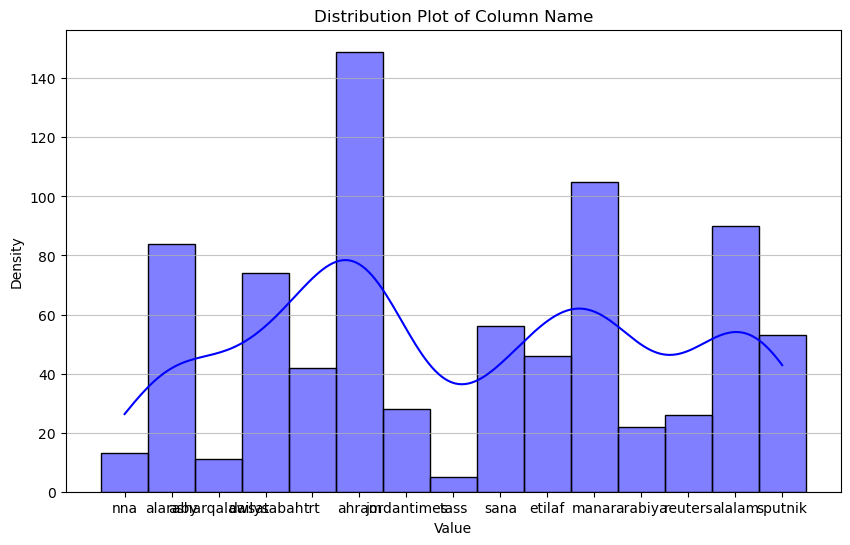

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['source'], bins=30, kde=True, color='blue')  # Use histplot with kde for a similar effect
plt.title('Distribution Plot of Column Name')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


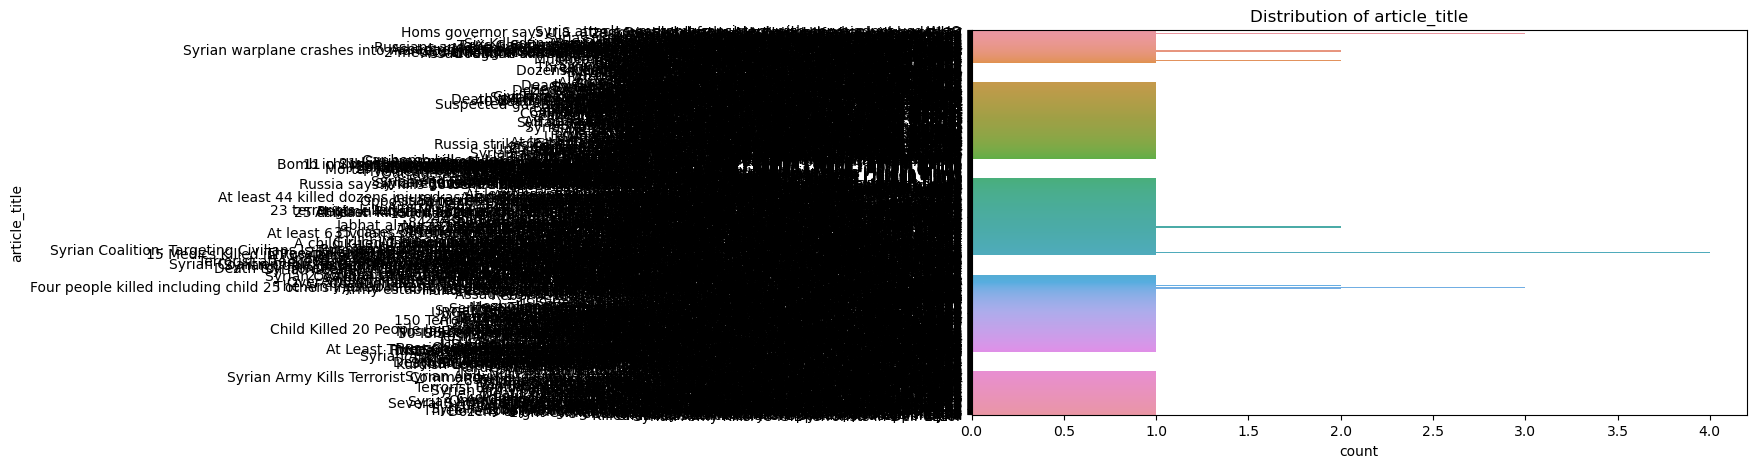

c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (error code 0x62)

<Figure size 1000x500 with 1 Axes>

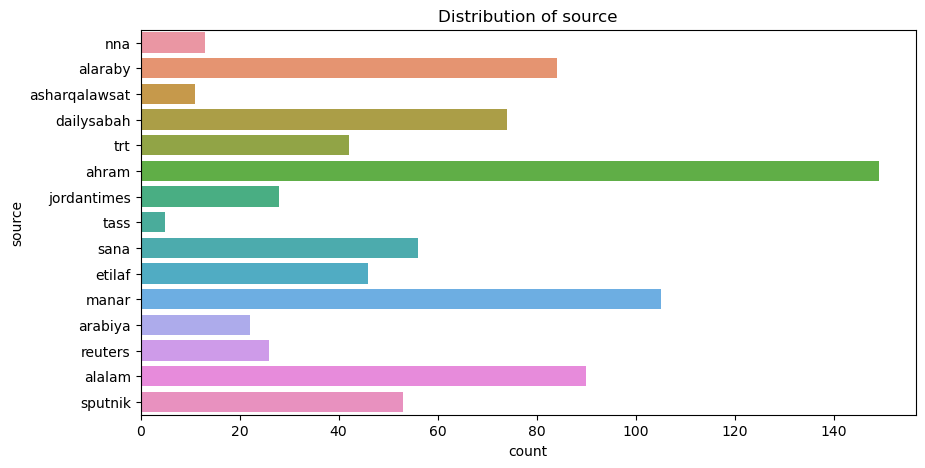

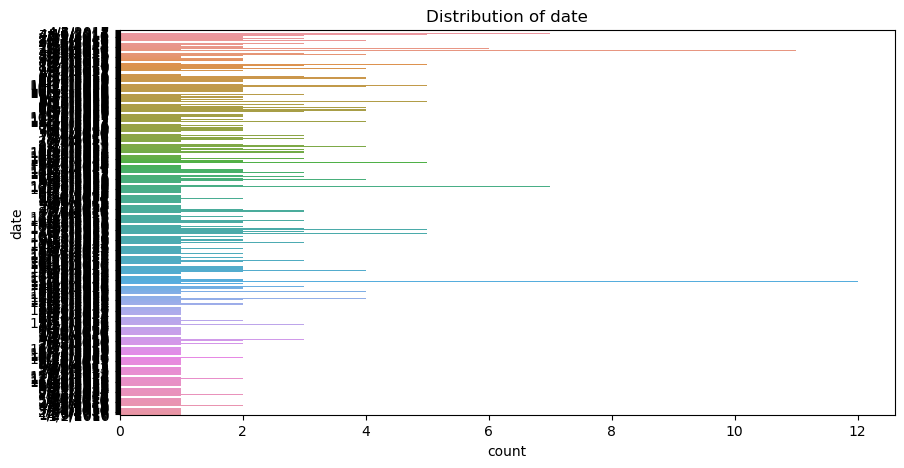

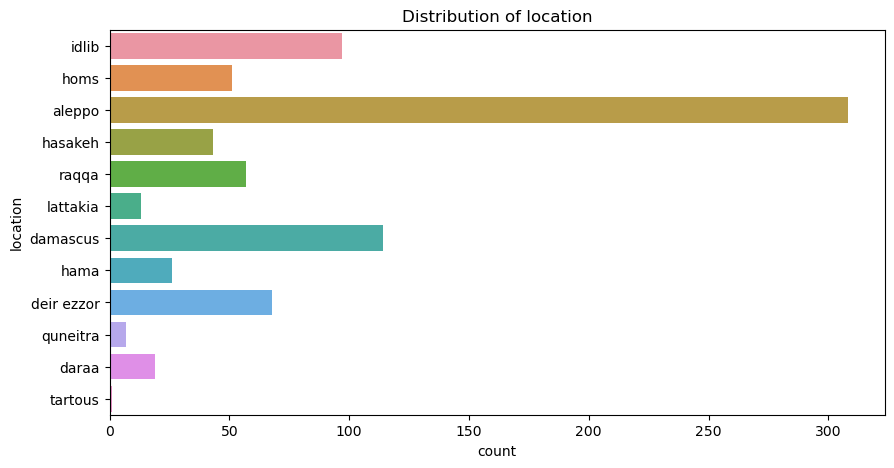

In [32]:
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


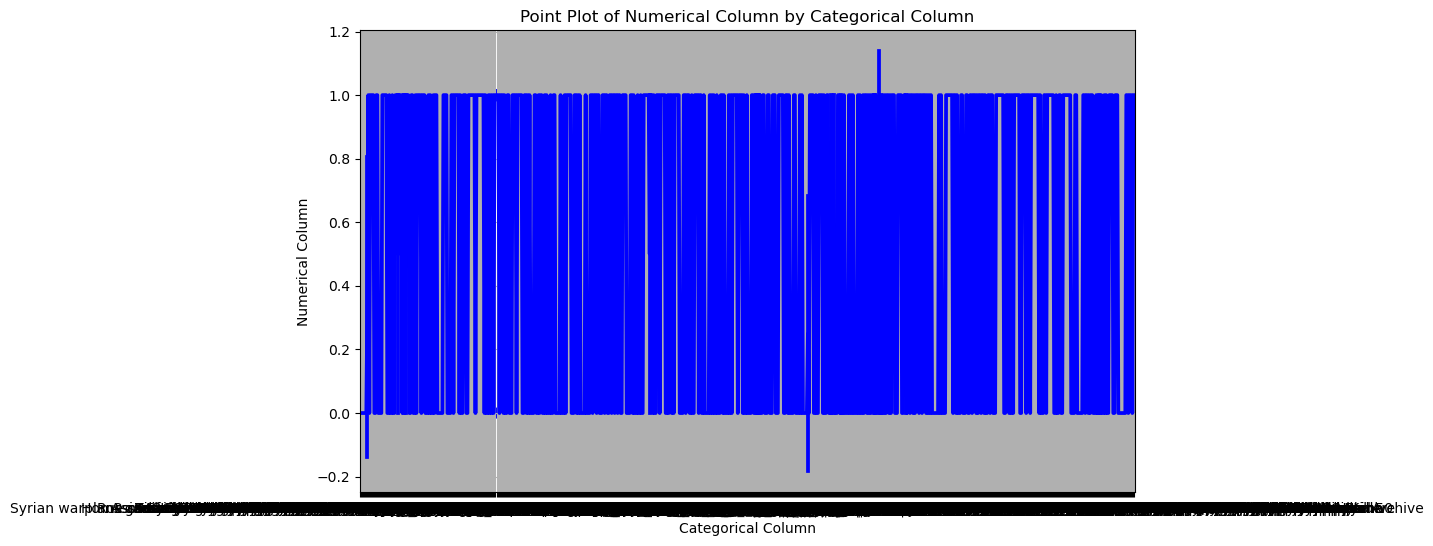

In [39]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='article_title', y='labels', data=df, ci='sd', color='blue')
plt.title('Point Plot of Numerical Column by Categorical Column')
plt.xlabel('Categorical Column')
plt.ylabel('Numerical Column')
plt.grid()
plt.show()

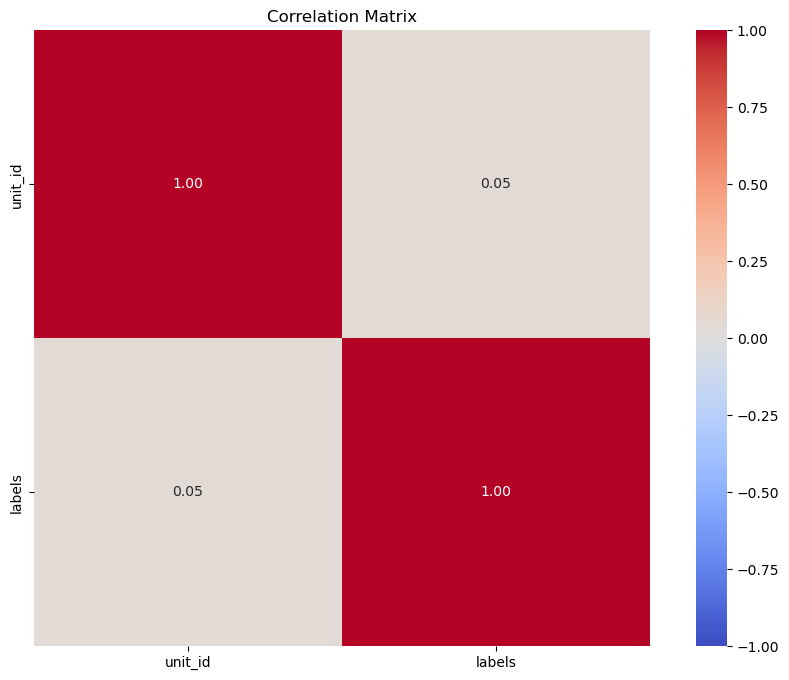

In [40]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_7596\4163095673.py:19: UserWarning: Glyph 149 (\x95) missing from current font.
  plt.tight_layout()
C:\Users\Student\AppData\Local\Temp\ipykernel_7596\4163095673.py:19: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


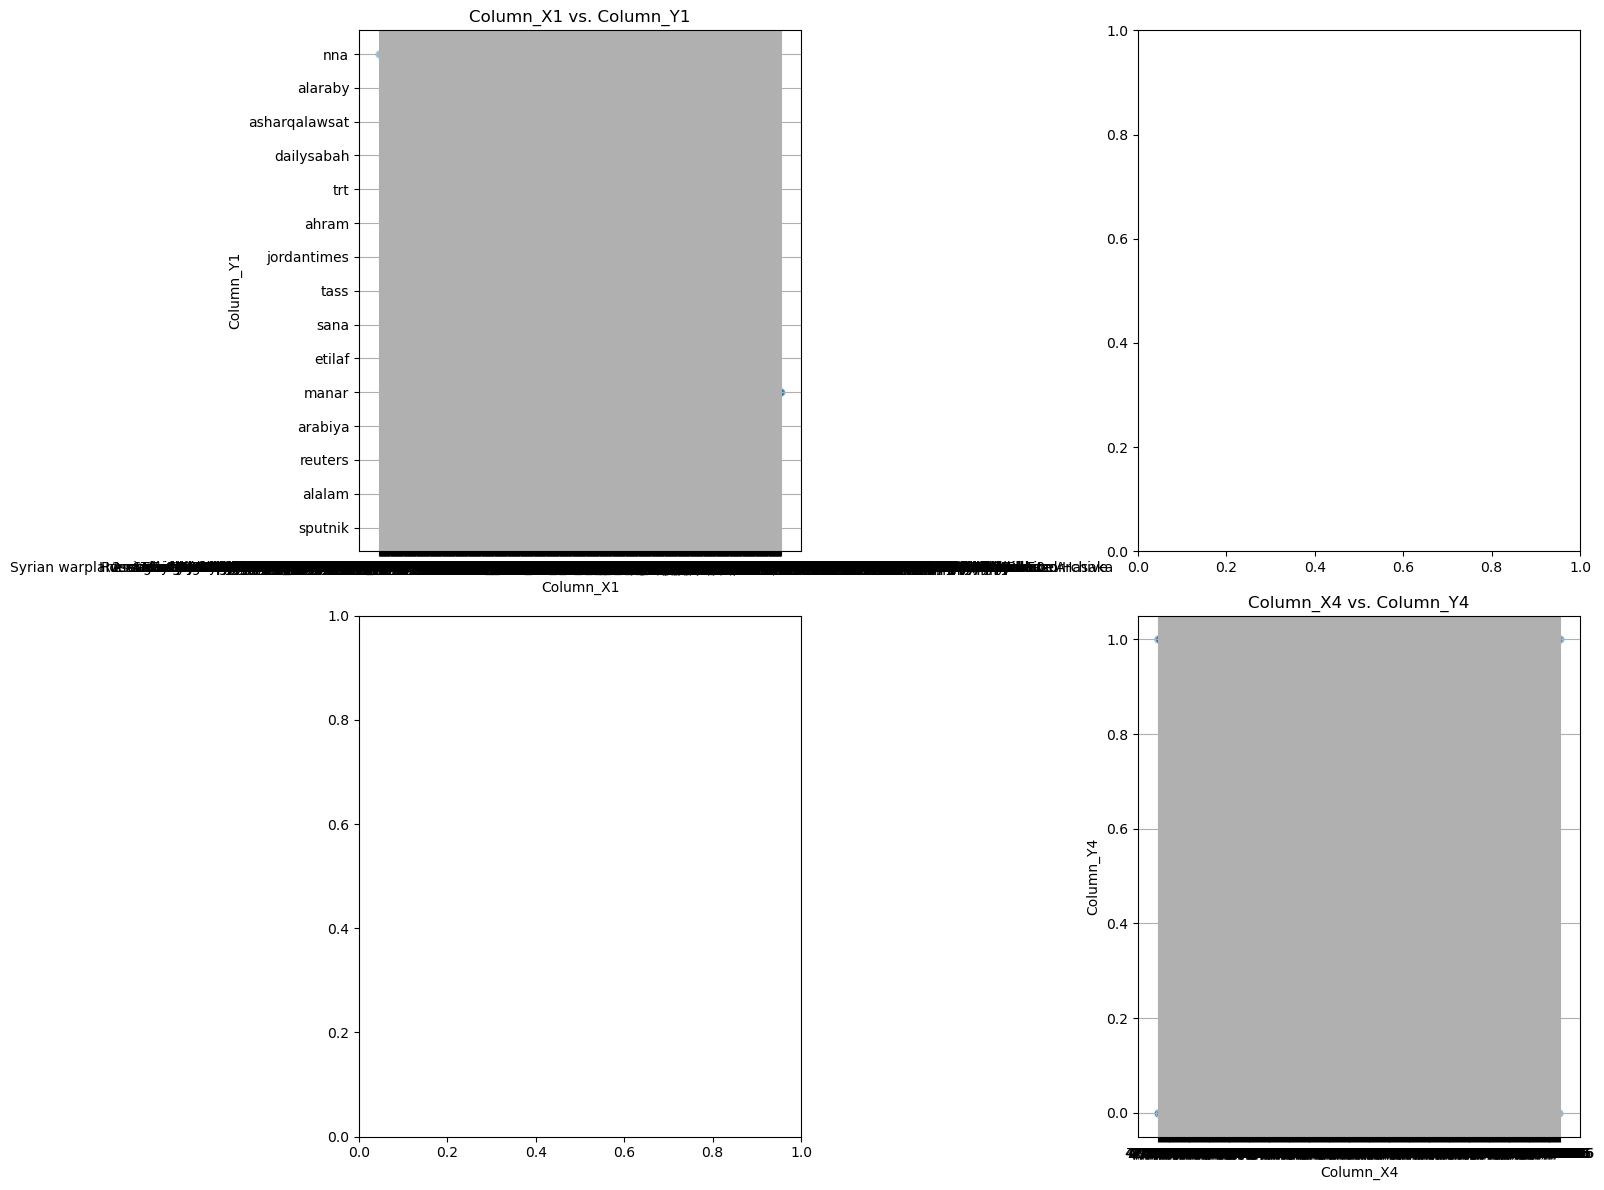

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot 1: Replace 'Column_X1' and 'Column_Y1' with actual column names
sns.scatterplot(x=df['article_title'], y=df['source'], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Column_X1 vs. Column_Y1')
axes[0, 0].set_xlabel('Column_X1')
axes[0, 0].set_ylabel('Column_Y1')
axes[0, 0].grid(True)



# Scatter plot 4: Replace 'Column_X4' and 'Column_Y4' with actual column names
sns.scatterplot(x=df['date'], y=df['labels'], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Column_X4 vs. Column_Y4')
axes[1, 1].set_xlabel('Column_X4')
axes[1, 1].set_ylabel('Column_Y4')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [46]:
#fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# Correlation matrix
#numeric_features = df[['date', 'labels']]
#$correlation_matrix = numeric_features.corr()
#sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, ax=axes[2, 1])
#axes[2, 1].set_title('Correlation Matrix')

#plt.tight_layout()
#plt.show()

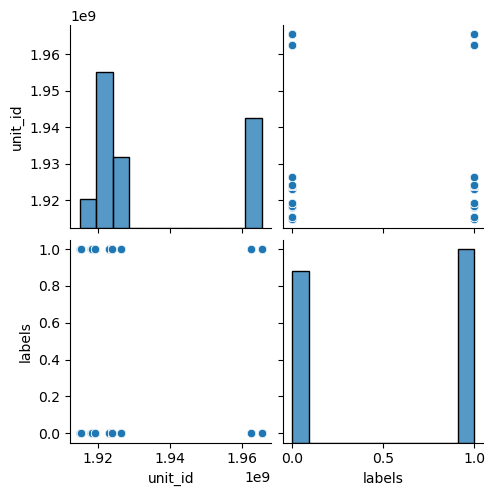

In [47]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

In [48]:
df.dtypes

unit_id             int64
article_title      object
article_content    object
source             object
date               object
location           object
labels              int64
dtype: object

In [67]:
import pandas as pd

df['article_title'], unique_values = pd.factorize(df['article_title'])
article_mapping = dict(zip(unique_values, range(len(unique_values))))
print("Value mapping:")
print(article_mapping)

Value mapping:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120:

In [68]:
import pandas as pd

df['source'], unique_values = pd.factorize(df['source'])
source_mapping = dict(zip(unique_values, range(len(unique_values))))
print("Value mapping:")
print(source_mapping)

Value mapping:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14}


In [71]:
import pandas as pd

df['location'], unique_values = pd.factorize(df['location'])
value_mapping = dict(zip(unique_values, range(len(unique_values))))
print("Value mapping:")
print(value_mapping)

Value mapping:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}


In [75]:
import pandas as pd

df['article_content'], unique_values = pd.factorize(df['article_content'])
cont_mapping = dict(zip(unique_values, range(len(unique_values))))
print("Value mapping:")
print(cont_mapping)

Value mapping:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120:

In [77]:
import pandas as pd

df['date'], unique_values = pd.factorize(df['date'])
date_mapping = dict(zip(unique_values, range(len(unique_values))))
print("Value mapping:")
print(date_mapping)

Value mapping:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120:

In [54]:
import pandas as pd

df['location'], unique_values = pd.factorize(df['location'])
value_mapping = dict(zip(unique_values, range(len(unique_values))))
print("Value mapping:")
print(value_mapping)

Value mapping:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}


In [78]:
df['article_title'].unique()


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [79]:
df['article_content'].unique()


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [80]:
df['location'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [81]:
df['date'].unique()


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [82]:
df['source'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [83]:
df['article_title']

0        0
1        1
2        2
3        3
4        4
      ... 
799    769
800    770
801    771
802    772
803    773
Name: article_title, Length: 804, dtype: int64

In [84]:
options = ""
for i, x in enumerate(article_mapping):
     options += f'<option value="{i}">{x}</option>\n'

print(options)

<option value="0">0</option>
<option value="1">1</option>
<option value="2">2</option>
<option value="3">3</option>
<option value="4">4</option>
<option value="5">5</option>
<option value="6">6</option>
<option value="7">7</option>
<option value="8">8</option>
<option value="9">9</option>
<option value="10">10</option>
<option value="11">11</option>
<option value="12">12</option>
<option value="13">13</option>
<option value="14">14</option>
<option value="15">15</option>
<option value="16">16</option>
<option value="17">17</option>
<option value="18">18</option>
<option value="19">19</option>
<option value="20">20</option>
<option value="21">21</option>
<option value="22">22</option>
<option value="23">23</option>
<option value="24">24</option>
<option value="25">25</option>
<option value="26">26</option>
<option value="27">27</option>
<option value="28">28</option>
<option value="29">29</option>
<option value="30">30</option>
<option value="31">31</option>
<option value="32">32</optio

In [85]:
df.columns

Index(['unit_id', 'article_title', 'article_content', 'source', 'date',
       'location', 'labels'],
      dtype='object')

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [87]:
df

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,0,0,0,0,0,0
1,1914947532,1,1,0,1,1,0
2,1914947533,2,2,0,2,2,0
3,1914947534,3,3,0,3,2,0
4,1914947535,4,4,0,4,2,0
...,...,...,...,...,...,...,...
799,1965511221,769,784,10,54,2,1
800,1965511222,770,785,10,219,2,1
801,1965511224,771,786,10,24,2,0
802,1965511226,772,787,10,219,0,1


In [88]:
X = df[['unit_id','article_title','article_content','source','location','date','labels']]

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   unit_id          804 non-null    int64
 1   article_title    804 non-null    int64
 2   article_content  804 non-null    int64
 3   source           804 non-null    int64
 4   location         804 non-null    int64
 5   date             804 non-null    int64
 6   labels           804 non-null    int64
dtypes: int64(7)
memory usage: 44.1 KB


c:\Users\Student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.11984004588350765

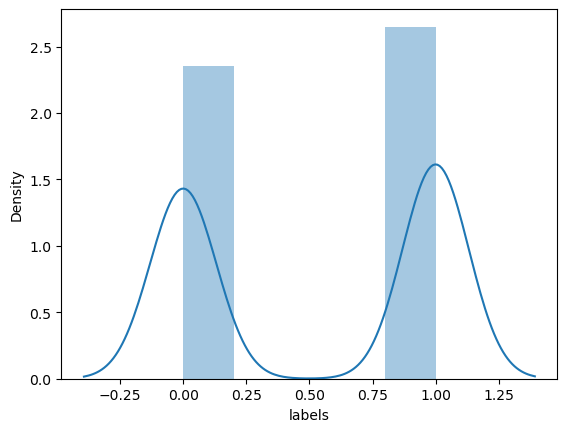

In [90]:
import numpy as np
sns.distplot(np.sqrt(df['labels']))
np.sqrt(df['labels']).skew()

In [91]:
X.dtypes

unit_id            int64
article_title      int64
article_content    int64
source             int64
location           int64
date               int64
labels             int64
dtype: object

In [92]:
X

,unit_id,article_title,article_content,source,location,date,labels
0,1914947530,0,0,0,0,0,0
1,1914947532,1,1,0,1,1,0
2,1914947533,2,2,0,2,2,0
3,1914947534,3,3,0,2,3,0
4,1914947535,4,4,0,2,4,0
...,...,...,...,...,...,...,...
799,1965511221,769,784,10,2,54,1
800,1965511222,770,785,10,2,219,1
801,1965511224,771,786,10,2,24,0
802,1965511226,772,787,10,0,219,1


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [96]:
X = df.drop('labels', axis=1)  # Replace 'target_column' with your target variable
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X_train

,unit_id,article_title,article_content,source,date,location
344,1924058123,336,342,3,219,0
350,1924058140,38,39,3,197,0
443,1926479006,429,439,10,101,0
331,1924058100,323,329,4,67,2
290,1924058039,287,290,6,52,0
...,...,...,...,...,...,...
71,1923102846,70,71,1,39,4
106,1923102921,105,106,1,74,8
270,1923848305,268,270,5,181,7
435,1926478977,421,431,9,252,2


In [98]:
X_test

,unit_id,article_title,article_content,source,date,location
192,1923848203,190,192,5,127,2
717,1965511119,688,702,10,379,6
168,1923848176,167,168,5,5,3
522,1926479226,500,513,8,295,2
536,1926479289,513,527,12,300,7
...,...,...,...,...,...,...
658,1965495331,629,643,14,358,0
356,1924058146,347,353,3,0,8
525,1926479240,503,516,12,298,1
748,1965511161,719,733,10,119,3


In [99]:
y_train

344    1
350    0
443    0
331    1
290    1
      ..
71     1
106    1
270    0
435    1
102    0
Name: labels, Length: 643, dtype: int64

In [100]:
y_test

192    1
717    1
168    1
522    0
536    1
      ..
658    0
356    0
525    0
748    0
517    0
Name: labels, Length: 161, dtype: int64

In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
X_train

array([[-0.63084639, -0.20683651, -0.21976995, -1.02219201,  0.39958058,
        -1.2852769 ],
       [-0.63084548, -1.55136855, -1.56281316, -1.02219201,  0.21552109,
        -1.2852769 ],
       [-0.50122732,  0.21276577,  0.21018117,  0.66003331, -0.58764758,
        -1.2852769 ],
       ...,
       [-0.64208048, -0.51364248, -0.53890893, -0.54155621,  0.08165965,
         1.33001755],
       [-0.50122887,  0.17667095,  0.17472128,  0.41971541,  0.67566981,
        -0.53804991],
       [-0.68199031, -1.26712184, -1.28356655, -1.50282782, -0.83863779,
        -0.53804991]])

In [103]:
X_test

array([[-6.42085944e-01, -8.65566970e-01, -8.84642829e-01,
        -5.41556208e-01, -3.70122732e-01, -5.38049912e-01],
       [ 1.58863267e+00,  1.38133556e+00,  1.37592494e+00,
         6.60033308e-01,  1.73819503e+00,  9.56404056e-01],
       [-6.42087390e-01, -9.69339577e-01, -9.91022489e-01,
        -5.41556208e-01, -1.39081625e+00, -1.64436420e-01],
       [-5.01215536e-01,  5.33107296e-01,  5.38185122e-01,
         1.79397502e-01,  1.03542244e+00, -5.38049912e-01],
       [-5.01212163e-01,  5.91761379e-01,  6.00239924e-01,
         1.14066912e+00,  1.07725414e+00,  1.33001755e+00],
       [ 1.58863749e+00,  1.70618894e+00,  1.69949641e+00,
         6.60033308e-01,  2.05611596e+00,  1.70363104e+00],
       [ 1.58778997e+00,  1.29561036e+00,  1.29170771e+00,
         1.62130492e+00, -1.08126166e+00,  2.09177072e-01],
       [-6.30847893e-01, -2.79026149e-01, -2.90689728e-01,
        -7.81874112e-01,  3.66115216e-01, -1.28527690e+00],
       [-6.42083856e-01, -7.48258806e-01, -7.693

In [108]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

m1 = RandomForestClassifier(random_state=42)
m1.fit(X_train,y_train)
print(m1)

RandomForestClassifier(random_state=42)


In [110]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
model1 = RandomForestClassifier()
model2 = SVC(probability=True)  # SVC needs probability=True for stacking
model3 = GradientBoostingClassifier()

# Define the stacking classifier with multiple base models
estimators = [
    ('rf', model1),
    ('svc', model2),
    ('gb', model3)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = stacking_model.score(X_test, y_test)
print(f'Stacking Classifier Accuracy: {accuracy:.2f}')

Stacking Classifier Accuracy: 0.60


In [122]:
X = df.drop('labels', axis=1)  # Features
y = df['labels']  

In [123]:
y

0      0
1      0
2      0
3      0
4      0
      ..
799    1
800    1
801    0
802    1
803    1
Name: labels, Length: 804, dtype: int64

In [124]:
X

,unit_id,article_title,article_content,source,date,location
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo
...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib


In [125]:
model1 = RandomForestClassifier()
model2 = SVC(probability=True)
model3 = GradientBoostingClassifier()

In [126]:
model1

RandomForestClassifier()

In [127]:
model2

SVC(probability=True)

In [128]:
model3

GradientBoostingClassifier()

In [137]:
from sklearn.svm import SVC

# Create an SVM classifier
m2 = SVC(kernel='linear', C=1.0, random_state=42)

In [138]:
m2

SVC(kernel='linear', random_state=42)